# On G and K model

In [1]:
import numpy as np
from numpy import exp, log, zeros, eye
from numpy.linalg import norm
from numpy.random import uniform, randn, choice
from scipy.stats import norm as ndist
from warnings import catch_warnings, filterwarnings
from scipy.optimize import fsolve

from smc_thug import SMCTHUG, computational_cost
from g_and_k_functions import fnorm, fnorm_broadcast, logprior
from g_and_k_functions import data_generator, grad_fnorm, sample_prior
from g_and_k_functions import log_epanechnikov_kernel, new_point

In [2]:
# Settings for G and K model
n_latents = 20
seed = 1234
theta0 = np.array([3.0, 1.0, 2.0, 0.5])
n_params = len(theta0)
d = n_latents + n_params

# Generate Data
y_star = data_generator(theta0, n_latents, seed)

In [3]:
N = 5000
B = 5

smc = SMCTHUG(
    N=N,
    d=d,
    ystar=y_star,
    logprior=logprior,
    ϵmin=0.2,
    pmin=0.2,
    pter=0.01,
    mcmc_iter=B,
    δ0=0.04,
    minstep=0.1/B,
    maxstep=1.0/B,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=200,
    B=B,
    maxMCMC=10,
    precondition=False
)

smc.sample_prior = lambda: sample_prior(n_params, n_latents)
smc.h = fnorm
smc.h_broadcast = fnorm_broadcast
smc.grad_h = lambda ξ: grad_fnorm(ξ, y_star)
smc.get_γ = lambda i: 0.0 #i**(-1/2)    # Set it to be constant.

### Stopping Criterion: Minimum Tolerance 0.2


In [4]:
out = smc.sample()

### Particles have been initialized from the prior.

### SMC step:  1
ϵ = 65968707.985	 N unique starting: 3136
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.5970
Stepsize used in next SMC iteration: 0.0488
Alpha used in next SMC iteration: 0.0100

### SMC step:  2
ϵ = 5132944.445	 N unique starting: 2880
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.5276
Stepsize used in next SMC iteration: 0.0575
Alpha used in next SMC iteration: 0.0100

### SMC step:  3
ϵ = 1159902.275	 N unique starting: 2808
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.4856
Stepsize used in next SMC iteration: 0.0663
Alpha used in next SMC iteration: 0.0100

### SMC step:  4
ϵ = 397372.393	 N unique starting: 2746
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.4408
Stepsize used in next SMC iteration: 0.0748
Alpha used in next SMC iteration: 0.0100

### SMC step:  5
ϵ = 108107.852	 N unique starting: 2706
Metropolis-Hastings steps:  5
Average 

Average Acceptance Probability: 0.1920
Stepsize used in next SMC iteration: 0.0990
Alpha used in next SMC iteration: 0.0100

### SMC step:  41
ϵ = 20.607	 N unique starting: 1797
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1864
Stepsize used in next SMC iteration: 0.0983
Alpha used in next SMC iteration: 0.0100

### SMC step:  42
ϵ = 20.107	 N unique starting: 1816
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1942
Stepsize used in next SMC iteration: 0.0980
Alpha used in next SMC iteration: 0.0100

### SMC step:  43
ϵ = 19.948	 N unique starting: 1836
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1746
Stepsize used in next SMC iteration: 0.0968
Alpha used in next SMC iteration: 0.0100

### SMC step:  44
ϵ = 19.922	 N unique starting: 1834
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1808
Stepsize used in next SMC iteration: 0.0959
Alpha used in next SMC iteration: 0.0100

### SMC step:  45
ϵ = 19.860	 N unique 

Average Acceptance Probability: 0.2006
Stepsize used in next SMC iteration: 0.1049
Alpha used in next SMC iteration: 0.0100

### SMC step:  81
ϵ = 14.781	 N unique starting: 1900
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2094
Stepsize used in next SMC iteration: 0.1054
Alpha used in next SMC iteration: 0.0100

### SMC step:  82
ϵ = 14.599	 N unique starting: 1931
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2052
Stepsize used in next SMC iteration: 0.1057
Alpha used in next SMC iteration: 0.0100

### SMC step:  83
ϵ = 14.450	 N unique starting: 1953
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2026
Stepsize used in next SMC iteration: 0.1058
Alpha used in next SMC iteration: 0.0100

### SMC step:  84
ϵ = 14.288	 N unique starting: 1936
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1984
Stepsize used in next SMC iteration: 0.1057
Alpha used in next SMC iteration: 0.0100

### SMC step:  85
ϵ = 14.103	 N unique 

Average Acceptance Probability: 0.1908
Stepsize used in next SMC iteration: 0.0783
Alpha used in next SMC iteration: 0.0100

### SMC step:  121
ϵ = 7.809	 N unique starting: 1716
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1850
Stepsize used in next SMC iteration: 0.0777
Alpha used in next SMC iteration: 0.0100

### SMC step:  122
ϵ = 7.709	 N unique starting: 1686
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1870
Stepsize used in next SMC iteration: 0.0772
Alpha used in next SMC iteration: 0.0100

### SMC step:  123
ϵ = 7.623	 N unique starting: 1715
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1984
Stepsize used in next SMC iteration: 0.0772
Alpha used in next SMC iteration: 0.0100

### SMC step:  124
ϵ = 7.508	 N unique starting: 1766
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2006
Stepsize used in next SMC iteration: 0.0772
Alpha used in next SMC iteration: 0.0100

### SMC step:  125
ϵ = 7.393	 N unique 

Average Acceptance Probability: 0.1846
Stepsize used in next SMC iteration: 0.0618
Alpha used in next SMC iteration: 0.0100

### SMC step:  161
ϵ = 4.467	 N unique starting: 1793
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1876
Stepsize used in next SMC iteration: 0.0614
Alpha used in next SMC iteration: 0.0100

### SMC step:  162
ϵ = 4.413	 N unique starting: 1781
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1814
Stepsize used in next SMC iteration: 0.0609
Alpha used in next SMC iteration: 0.0100

### SMC step:  163
ϵ = 4.353	 N unique starting: 1753
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1966
Stepsize used in next SMC iteration: 0.0608
Alpha used in next SMC iteration: 0.0100

### SMC step:  164
ϵ = 4.299	 N unique starting: 1798
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1774
Stepsize used in next SMC iteration: 0.0601
Alpha used in next SMC iteration: 0.0100

### SMC step:  165
ϵ = 4.243	 N unique 

Average Acceptance Probability: 0.1858
Stepsize used in next SMC iteration: 0.0450
Alpha used in next SMC iteration: 0.0100


# Bayesian Inverse Problem

Deterministic Function $F_L:\mathbb{R}^3\to\mathbb{R}$ 
$$
F_L(\xi) = F_L(\theta, \eta) = F(\theta) + \sigma\eta \qquad \sigma > 0
$$
where $F:\mathbb{R}^2\to\mathbb{R}$ is given by

In [1]:
# functions for approximate lifted BIP posterior 
from bip_functions import F, FL, logpriorL, log_epanechnikov_kernelL
from bip_functions import log_posteriorL, grad_FL, FL_broadcast, sample_priorL
from smc_thug import SMCTHUG

from numpy import errstate, log, ones, zeros
from numpy.linalg import norm

In [2]:
N = 5000
B = 5
σ = 0.00000001
y_bip = 1
d_bip = 3

In [6]:
smc_bip = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=1e-10,
    pmin=0.3,
    pter=0.01,
    mcmc_iter=B,
    δ0=0.04,
    minstep=0.001,
    maxstep=0.5,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=200,
    B=B,
    maxMCMC=10,
    precondition=False
)

### Stopping Criterion: Minimum Tolerance 1e-10


In [7]:
# def logkernel_bip(self, ξ, σ):
#     u = norm(FL(ξ, σ) - self.ystar)
#     ϵ = self.EPSILON[self.t]
#     with errstate(divide='ignore'):
#         return log((3*(1 - (u**2 / (ϵ**2))) / (4*ϵ)) * float(norm(FL(ξ, σ) - self.ystar) <= ϵ))
    
# smc_bip.logkernel = lambda self, ξ: logkernel_bip(self, ξ, σ)

In [8]:
smc_bip.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip.sample_prior = sample_priorL
smc_bip.get_γ = lambda i: i**(-1/20)    # Set it to be constant.

- Need to use $\| FL() - y\|$
- Need to update grad_FL because of the norm

In [9]:
out_bip = smc_bip.sample()

### Particles have been initialized from the prior.

### SMC step:  1
ϵ = 15.32968	 N unique starting: 3184
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8276
Stepsize used in next SMC iteration: 0.0521
Alpha used in next SMC iteration: 0.0059

### SMC step:  2
ϵ = 4.19017	 N unique starting: 2999
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.8082
Stepsize used in next SMC iteration: 0.0671
Alpha used in next SMC iteration: 0.0036

### SMC step:  3
ϵ = 1.92463	 N unique starting: 2991
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7894
Stepsize used in next SMC iteration: 0.0858
Alpha used in next SMC iteration: 0.0023

### SMC step:  4
ϵ = 1.59309	 N unique starting: 3019
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.7550
Stepsize used in next SMC iteration: 0.1077
Alpha used in next SMC iteration: 0.0015

### SMC step:  5
ϵ = 1.43695	 N unique starting: 2975
Metropolis-Hastings steps:  5
Average Acceptance Probabi

Average Acceptance Probability: 0.2110
Stepsize used in next SMC iteration: 0.1880
Alpha used in next SMC iteration: 0.0005

### SMC step:  41
ϵ = 0.0084	 N unique starting: 2061
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2128
Stepsize used in next SMC iteration: 0.1800
Alpha used in next SMC iteration: 0.0005

### SMC step:  42
ϵ = 0.00716	 N unique starting: 2040
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2130
Stepsize used in next SMC iteration: 0.1723
Alpha used in next SMC iteration: 0.0006

### SMC step:  43
ϵ = 0.00616	 N unique starting: 2058
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2230
Stepsize used in next SMC iteration: 0.1658
Alpha used in next SMC iteration: 0.0006

### SMC step:  44
ϵ = 0.0053	 N unique starting: 2050
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2096
Stepsize used in next SMC iteration: 0.1585
Alpha used in next SMC iteration: 0.0007

### SMC step:  45
ϵ = 0.00448	 N uniq

Average Acceptance Probability: 0.1396
Stepsize used in next SMC iteration: 0.0155
Alpha used in next SMC iteration: 0.0285

### SMC step:  81
ϵ = 1e-05	 N unique starting: 1499
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1480
Stepsize used in next SMC iteration: 0.0144
Alpha used in next SMC iteration: 0.0320

### SMC step:  82
ϵ = 1e-05	 N unique starting: 1517
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1468
Stepsize used in next SMC iteration: 0.0133
Alpha used in next SMC iteration: 0.0361

### SMC step:  83
ϵ = 1e-05	 N unique starting: 1485
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1460
Stepsize used in next SMC iteration: 0.0123
Alpha used in next SMC iteration: 0.0406

### SMC step:  84
ϵ = 1e-05	 N unique starting: 1500
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1520
Stepsize used in next SMC iteration: 0.0115
Alpha used in next SMC iteration: 0.0455

### SMC step:  85
ϵ = 1e-05	 N unique start

Average Acceptance Probability: 0.1854
Stepsize used in next SMC iteration: 0.0011
Alpha used in next SMC iteration: 0.6573

### SMC step:  121
ϵ = 0.0	 N unique starting: 1650
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1900
Stepsize used in next SMC iteration: 0.0011
Alpha used in next SMC iteration: 0.6765

### SMC step:  122
ϵ = 0.0	 N unique starting: 1663
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1986
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.6937

### SMC step:  123
ϵ = 0.0	 N unique starting: 1707
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1844
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.7127

### SMC step:  124
ϵ = 0.0	 N unique starting: 1669
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1950
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.7293

### SMC step:  125
ϵ = 0.0	 N unique starting: 

In [14]:
import matplotlib.pyplot as plt

In [19]:
xs, ys = zip(*sorted(zip(out_bip['EPSILON'], out_bip['UNIQUE_PARTICLES'])))

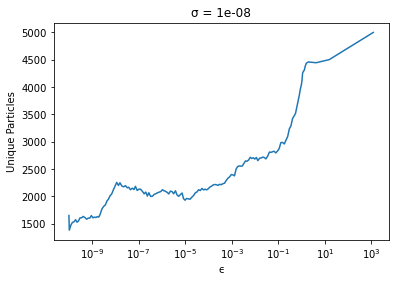

In [41]:
fig, ax = plt.subplots()
ax.plot(xs, ys)
ax.set_xlabel("ϵ")
ax.set_ylabel("Unique Particles")
ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])
plt.title("σ = {}".format(σ))
plt.show()

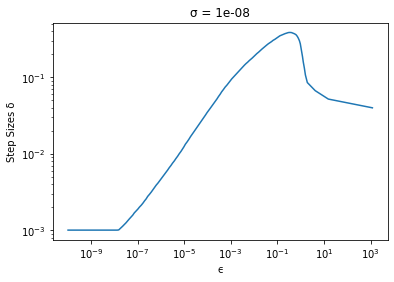

In [86]:
xs, ys = zip(*sorted(zip(out_bip['EPSILON'], out_bip['STEP_SIZES'])))
fig, ax = plt.subplots()
ax.plot(xs, ys)
ax.set_xlabel("ϵ")
ax.set_ylabel("Step Sizes δ")
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("σ = {}".format(σ))
plt.show()

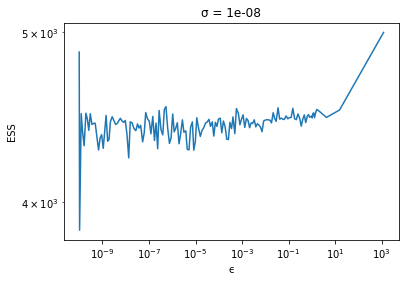

In [87]:
xs, ys = zip(*sorted(zip(out_bip['EPSILON'], out_bip['ESS'])))
fig, ax = plt.subplots()
ax.plot(xs, ys)
ax.set_xlabel("ϵ")
ax.set_ylabel("ESS")
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("σ = {}".format(σ))
plt.show()

In [58]:
import symnum.numpy as snp
from symnum import (
    numpify, named_array, jacobian, grad, 
    vector_jacobian_product, matrix_hessian_product)
import sympy
import numpy as np

dim_θ = 2
dim_y = 1

@numpify(dim_θ)
def forward_func(θ):
    return snp.array([θ[1]**2 + 3 * θ[0]**2 * (θ[0]**2 - 1)])

def create_fig_if_none(ax, **fig_kw):
    if ax is None:
        fig, ax = plt.subplots(**fig_kw)
    else:
        fig = ax.figure
    return fig, ax

def split_into_integer_parts(n, m):
    return [round(n / m)] * (m - 1) + [n - round(n / m) * (m - 1)]

def grid_on_interval(interval, n_points, cosine_spacing=False):
    if cosine_spacing:
        # Use non-linear spacing with higher density near endpoints
        ts =  ((1 + np.cos(np.linspace(0, 1, n_points) * np.pi)) / 2)
    else:
        ts = np.linspace(0, 1, n_points)
    # If open interval space over range [left + eps, right - eps]
    eps = 10 * np.finfo(np.float64).eps
    left = (float(interval.left) + eps if interval.left_open 
            else float(interval.left))
    right = (float(interval.right) - eps if interval.right_open 
             else float(interval.right))
    return left + ts * (right - left)



def solve_for_limiting_manifold(y, n_points=200, cosine_spacing=False):
    assert n_points % 2 == 0, 'n_points must be even'
    θ = named_array('θ', 2)
    # solve F(θ) = y for θ[1] in terms of θ[0]
    θ_1_gvn_θ_0 = sympy.solve(forward_func(θ)[0] - y, θ[1])
    # find interval(s) over which θ[0] gives real θ[1] solutions
    θ_0_range = sympy.solveset(
        θ_1_gvn_θ_0[0]**2 > 0, θ[0], domain=sympy.Reals)
    θ_0_intervals = (
        θ_0_range.args if isinstance(θ_0_range, sympy.Union) 
        else [θ_0_range])
    # create  grid of values over valid θ[0] interval(s)
    n_intervals = len(θ_0_intervals)
    θ_0_grids = [
        grid_on_interval(intvl, n_pt + 1, cosine_spacing)
        for intvl, n_pt in zip(
            θ_0_intervals, 
            split_into_integer_parts(n_points // 2, n_intervals))]
    # generate NumPy function to calculate θ[1] in terms of θ[0]
    solve_func = sympy.lambdify(θ[0], θ_1_gvn_θ_0)
    manifold_points = []
    for θ_0_grid in θ_0_grids:
        # numerically calculate +/- θ[1] solutions over θ[0] grid
        θ_1_grid_neg, θ_1_grid_pos = solve_func(θ_0_grid)
        # stack θ[0] and θ[1] values in to 2D array in anticlockwise order
        manifold_points.append(np.stack([
            np.concatenate([θ_0_grid, θ_0_grid[-2:0:-1]]),
            np.concatenate([θ_1_grid_neg, θ_1_grid_pos[-2:0:-1]])
        ], -1))
    return manifold_points

def plot_limiting_manifold(y, ax=None, num_points=200):
    manifold_points = solve_for_limiting_manifold(
        y, num_points, cosine_spacing=True)
    fig, ax = create_fig_if_none(ax)
    # repeat first point to close loop by duplicating index
    for component in manifold_points:
        indices = np.arange(component.shape[0] + 1) % component.shape[0]
        line, = ax.plot(component[indices, 0], 
                        component[indices, 1], '-', color='C1', lw=1.)
    return fig, ax, line

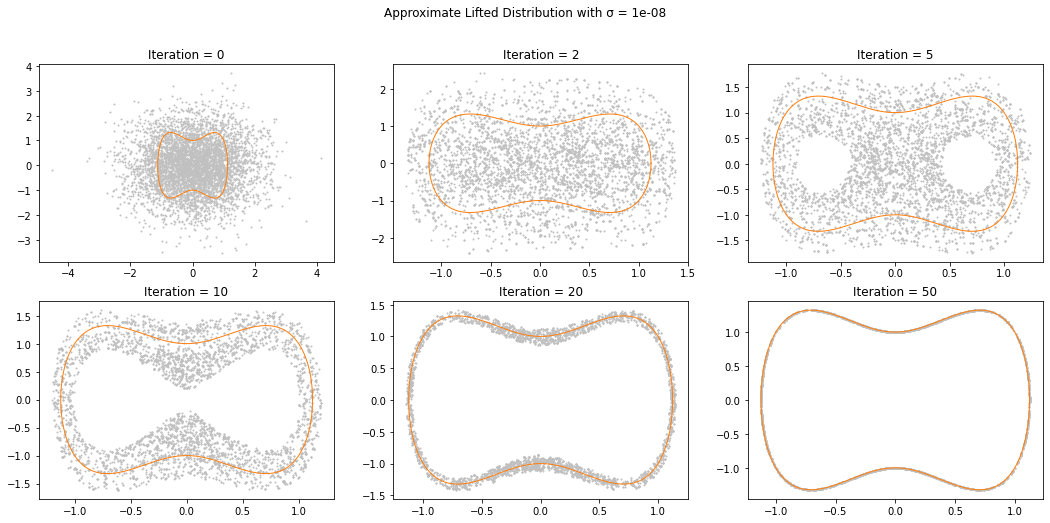

In [83]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
fig.suptitle("Approximate Lifted Distribution with σ = {}".format(σ))
### ROW 1
ax[0, 0].scatter(*out_bip['P'][:, :2, 0].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 0])
ax[0, 0].set_title("Iteration = 0")

iter1 = 2
ax[0, 1].scatter(*out_bip['P'][out_bip['A'][:, iter1], :2, iter1].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 1])
ax[0, 1].set_title("Iteration = {}".format(iter1))

iter2 = 5
ax[0, 2].scatter(*out_bip['P'][out_bip['A'][:, iter2], :2, iter2].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 2])
ax[0, 2].set_title("Iteration = {}".format(iter2))

### ROW 2
iter3 = 10
ax[1, 0].scatter(*out_bip['P'][out_bip['A'][:, iter3], :2, iter3].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 0])
ax[1, 0].set_title("Iteration = {}".format(iter3))

iter4 = 20
ax[1, 1].scatter(*out_bip['P'][out_bip['A'][:, iter4], :2, iter4].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 1])
ax[1, 1].set_title("Iteration = {}".format(iter4))

iter5 = 50
ax[1, 2].scatter(*out_bip['P'][out_bip['A'][:, iter5], :2, iter5].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 2])
ax[1, 2].set_title("Iteration = {}".format(iter5))
plt.show()

In [90]:
def some(a, b, c, d, e):
    return a, b, c, d, e

In [102]:
newsome = lambda *args: some(*args)[:3]

In [103]:
newsome(1, 2, 3, 4, 5)

(1, 2, 3)